10000
Done!
T


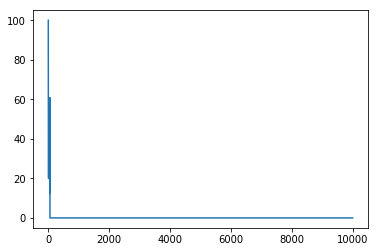

TX


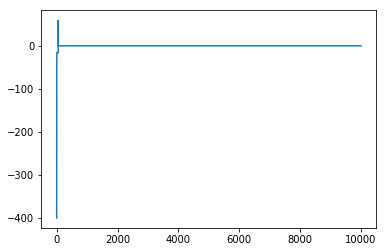

X


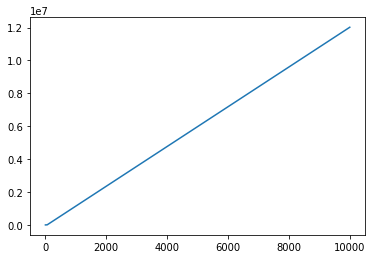

Mu0


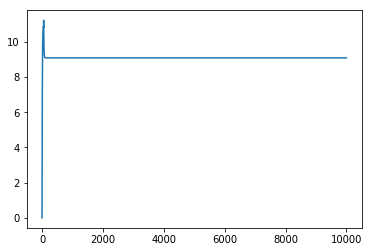

Mu1


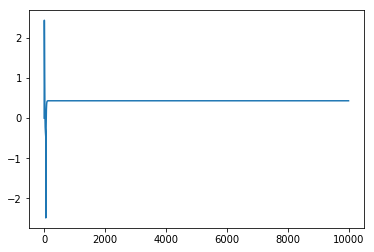

Mu2


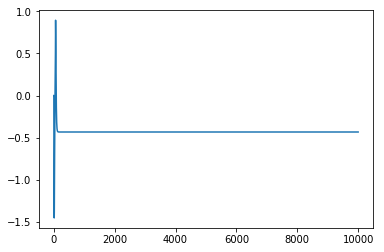

R0


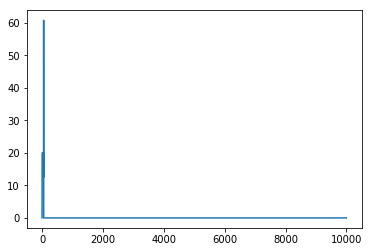

R1


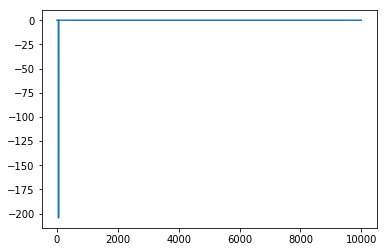

Ez0


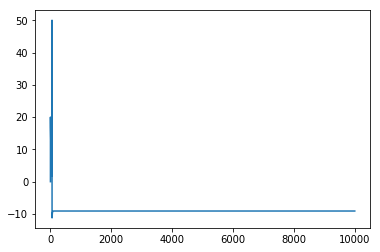

Ez1


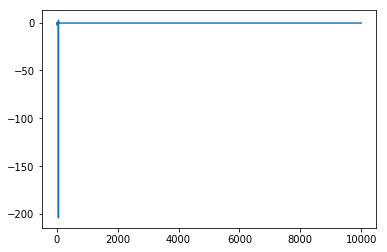

Ew0


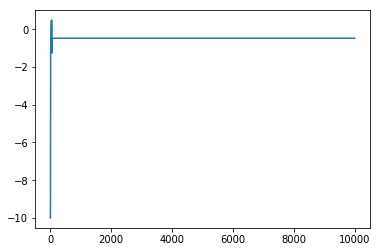

A


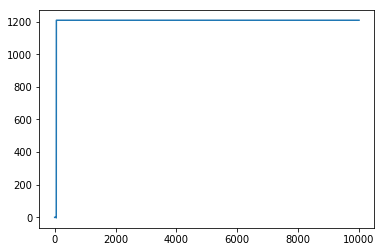

VFE


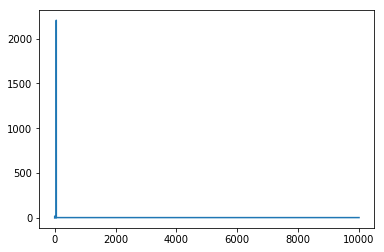

-1.1526827515424068e-19
6.931805752320221e-13
6.925532939914599e-13


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


simTime = 10000
dt = 1

time = range(int(simTime/dt))
N = len(time)
print(N)
action =True

# generative model parameters
desired_temp = 10 #desired temperature
# time action onsets
actionTime = simTime/ 4


# initialize sensors
r0 = [0]
r1 = [0]
#sensort variances
varz0 = 0.70916
varz1 = 0.70916

varz0 = 0.1
varz1 = 0.1
varw0 = 0.01
varw1 = 0.01

# params for generative process
T0 = 100 # temperature at x = 0

#initialize brain states
mu0 = [0]
mu1 = [0]
mu2 = [0]

# sensory noise
zgp_0 = np.random.uniform(0,0.000000, N)
zgp_1 = np.random.uniform(0,0.000000,N)


# innitialize action variable
a = [0]
#initialize generative process
xdot = [a[0]]
x = [2] # start arbitrarily 
T = [T0/ (x[0]^2 + 1)]
Tx = [(-2 * T0 * x[0]) * ((x[0]^2 + 1)**-2)]
Tdot = [Tx[0] * xdot[0]]


# initialize error terms
ez0 = [r0[0] - mu0[0]]
ez1 = [r1[0] - mu1[0]]
ew0 = [r0[0] + mu0[0] - desired_temp]
ew1 = [mu2[0] + mu1[0]] 

#learning rates
k = 0.1 # for inference
ka = 0.01 # for learning/action!

def compute_vfe(ez0, ez1, ew0, ew1):
    return ((1/2*varz0) * np.square(ez0)) + ((1/2*varz1) * np.square(ez1)) + ((1/2*varw0) * np.square(ew0)) + ((1/2*varw1) * np.square(ew1)) + np.log(varz0 + varz1 + varw0 + varw1)       


# initialize the variational energy
vfe = [compute_vfe(ez0[0], ez1[0], ew0[0], ew1[0])]

for i in range(1, N):
    xdot.append(a[i-1]) # this is the action
    x.append(x[i-1] + dt*(xdot[i]))
    T.append(T0/((x[i]**2)+1))
    Tx.append((-2 * T0 * x[i]) * (x[i]**2 + 1)**-2)
    Tdot.append(Tx[i] * xdot[i])
    
    # calculate the sensory input!
    r0.append(T[i] + zgp_0[i])
    r1.append(Tdot[i] + zgp_1[i])
    
    ez0.append(r0[i] - mu0[i-1]) 
    ez1.append(r1[i]- mu1[i-1])
    ew0.append(mu1[i-1] + mu0[i-1] - desired_temp)
    ew1.append(mu2[i-1] + mu1[i-1])
    vfe.append(compute_vfe(ez0[i], ez1[i], ew0[i], ew1[i]))
    
    mu0.append(mu0[i-1] + k * (mu1[i-1] - (ka *((-1 * ez0[i]/varz0) + (ew0[i]/varw0)))))
    mu1.append(mu1[i-1] + k * (mu2[i-1] - (ka *((-1 * ez1[i]/varz1) + (ew0[i]/varw0) + (ew1[i]/varw1)))))
    mu2.append(mu2[i-1] - k* ka *(ew1[i]/varw1))
    
    if time[i] > 50:
        a.append(a[i-1] -(ka * Tx[i] * ez1[i]/varz1)) 
    else:
        a.append(0)
    
print("Done!")
names = ["T","TX","X","Mu0","Mu1","Mu2","R0","R1", "Ez0","Ez1","Ew0","A", "VFE"]
vals = [T, Tx, x, mu0, mu1, mu2, r0, r1, ez0, ez1, ew0, a,vfe]
for (n,v) in zip(names, vals):
    print(n)
    plt.plot(time,v)
    plt.show()
"""
print("T")
plt.plot(time, T)
plt.show()
print("TX")
plt.plot(time, Tx)
plt.show()
print("X")
plt.plot(time, x)
plt.show()
print("Mu0")
plt.plot(time, mu0)
plt.show()
print("Mu1")
plt.plot(time, mu1)
plt.show()
print("Mu2")
plt.plot(time, mu2)
plt.show()
print("R0")
plt.plot(time, r0)
plt.show()
print("R1")
plt.plot(time, r1)
plt.show()
print("Ez0")
plt.plot(time, ez0)
plt.show()
print("Ez1")
plt.plot(time, ez1)
plt.show()
print("Ew0")
plt.plot(time, ew0)
plt.show()
print("Ew1")
plt.plot(time, ew1)
plt.show()
print("A")
plt.plot(time, a)
plt.show()
print("VFE")
plt.plot(time, vfe)
plt.show()"""
print(Tx[-1])
print(np.mean(T[simTime-10:simTime]))
print(T[-1])

700
Done!
T


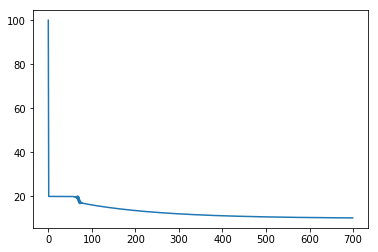

TX


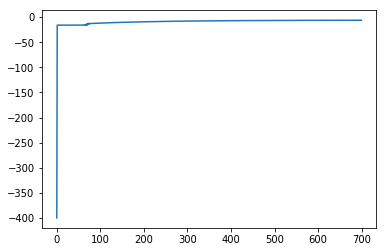

X


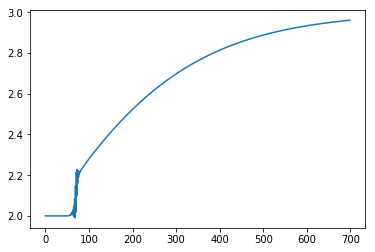

Mu0


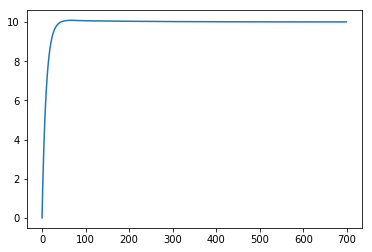

Mu1


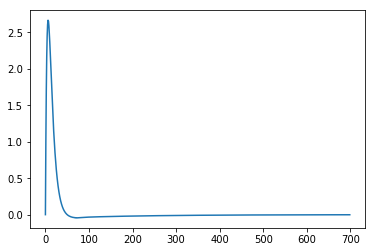

Mu2


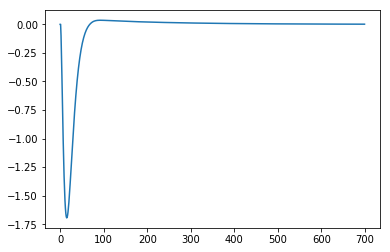

R0


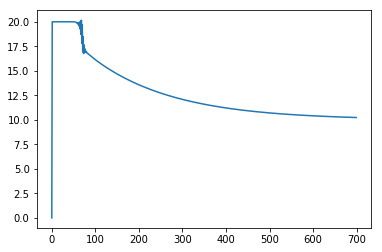

R1


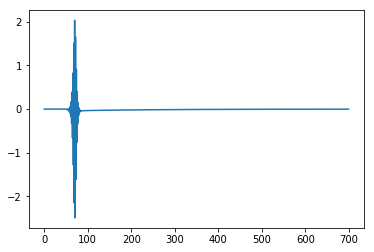

Ez0


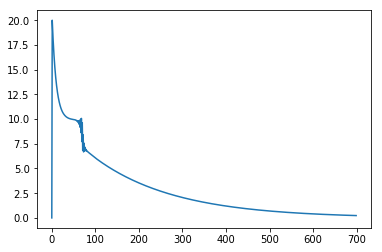

Ez1


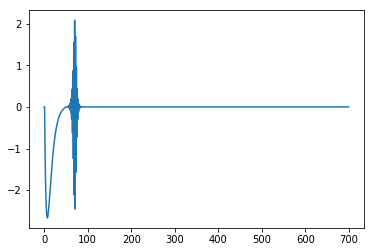

Ew0


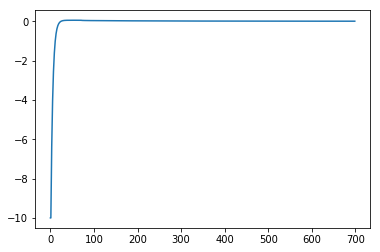

A


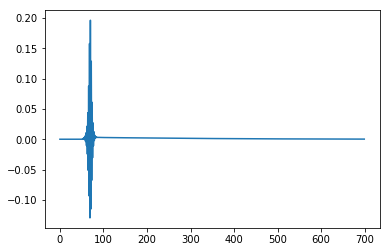

VFE


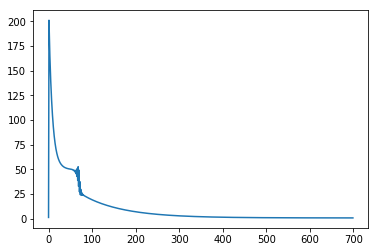

10.24116820719343


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
simTime = 700
dt = 1

time = range(int(simTime/dt))
N = len(time)
print(N)
action =True

desired_temp = 10 #desired temperature
# time action onsets
actionTime = simTime/ 4
r0 = [0]
r1 = [0]
#sensort variances
varz0 = 1
varz1 = 1
varw0 = 0.01
varw1 = 0.01

T0 = 100 # temperature at x = 0

mu0 = [0]
mu1 = [0]
mu2 = [0]

# sensory noise
zgp_0 = np.random.uniform(0,0.000000, N)
zgp_1 = np.random.uniform(0,0.000000,N)


# innitialize action variable
a = [0]
#initialize generative process
xdot = [a[0]]
x = [2] # start arbitrarily 
T = [T0/ (x[0]^2 + 1)]
Tx = [(-2 * T0 * x[0]) * ((x[0]^2 + 1)**-2)]
Tdot = [Tx[0] * xdot[0]]


# initialize error terms
ez0 = [r0[0] - mu0[0]]
ez1 = [r1[0] - mu1[0]]
ew0 = [r0[0] + mu0[0] - desired_temp]
ew1 = [mu2[0] + mu1[0]] 

#learning rates
k = 0.1 # for inference
ka = 0.01 # for learning/action!

def compute_vfe(ez0, ez1, ew0, ew1):
    return ((1/2*varz0) * np.square(ez0)) + ((1/2*varz1) * np.square(ez1)) + ((1/2*varw0) * np.square(ew0)) + ((1/2*varw1) * np.square(ew1)) + np.log(varz0 + varz1 + varw0 + varw1)       


# initialize the variational energy
vfe = [compute_vfe(ez0[0], ez1[0], ew0[0], ew1[0])]

for i in range(1, N):
    xdot.append(a[i-1]) # this is the action
    x.append(x[i-1] + dt*(xdot[i]))
    T.append(T0/((x[i]**2)+1))
    Tx.append((-2 * T0 * x[i]) * (x[i]**2 + 1)**-2)
    Tdot.append(Tx[i] * xdot[i])
    
    # calculate the sensory input!
    r0.append(T[i] + zgp_0[i])
    r1.append(Tdot[i] + zgp_1[i])
    
    ez0.append(r0[i] - mu0[i-1]) 
    ez1.append(r1[i]- mu1[i-1])
    ew0.append(mu1[i-1] + mu0[i-1] - desired_temp)
    ew1.append(mu2[i-1] + mu1[i-1])
    vfe.append(compute_vfe(ez0[i], ez1[i], ew0[i], ew1[i]))
    
    mu0.append(mu0[i-1] + k * (mu1[i-1] - (ka *((-1 * ez0[i]/varz0) + (ew0[i]/varw0)))))
    mu1.append(mu1[i-1] + k * (mu2[i-1] - (ka *((-1 * ez1[i]/varz1) + (ew0[i]/varw0) + (ew1[i]/varw1)))))
    mu2.append(mu2[i-1] - k* ka *(ew1[i]/varw1))
    
    if time[i] > 50:
        a.append(a[i-1] -(ka * Tx[i] * ez1[i]/varz1)) 
    else:
        a.append(0)
    
print("Done!")
names = ["T","TX","X","Mu0","Mu1","Mu2","R0","R1", "Ez0","Ez1","Ew0","A", "VFE"]
vals = [T, Tx, x, mu0, mu1, mu2, r0, r1, ez0, ez1, ew0, a,vfe]
for (n,v) in zip(names, vals):
    print(n)
    plt.plot(time,v)
    plt.show()
print(T[i-1])